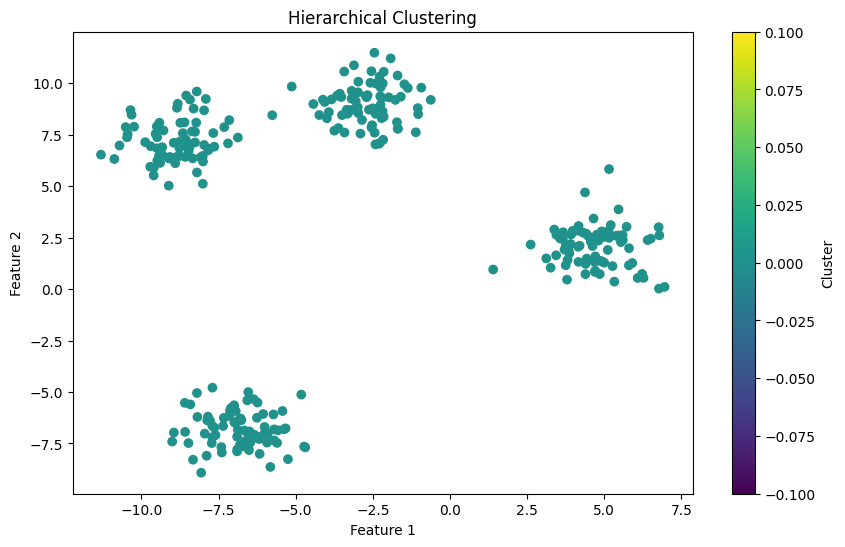

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Generate Synthetic data

def generate_data(n_samples=300, n_centers=4,random_seed=42):
    np.random.seed(random_seed)
    points_per_center = n_samples//n_centers
    centers = np.random.uniform(-10,10,(n_centers,2))
    x=np.vstack([center+np.random.randn(points_per_center,2) for center in centers])
    return x
# Calculate Euclidean distance

def euclidean_distance(a,b):
    return np.sqrt(np.sum((a-b)**2))
# Compute the distance matrix

def compute_distance_matrix(x):
    n_samples=x.shape[0]
    distances = np.zeros((n_samples,n_samples))

    for i in range(n_samples):
        for j in range(i+1,n_samples):
            distances[i,j] = euclidean_distance(x[i],x[j])
        distances[j,i] = distances[i,j]
    return distances
#Hierarchial Clustering
def hierarchial_clustering(x):
    distances = compute_distance_matrix(x)
    n_samples = len(x)

    # Initialize Clusters
    clusters = [[i] for i in range(n_samples)]

    while len(clusters) > 1:
        # Find the two closest clusters
        min_dist = float('inf')
        to_merge = (None, None)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # Calculate minimum distance between clusters (single linkage)
                d = np.min([distances[p][q] for p in clusters[i] for q in clusters[j]])

                if d < min_dist:
                    min_dist = d
                    to_merge = (i, j)

        # Merge the two closest clusters
        i, j = to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]

    return clusters
#Function to extract cluster labels

def extract_clusters(clusters, n_samples):
    labels = np.zeros(n_samples)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
        return labels

#Generate data and perform hierarchial clustering

x = generate_data()
final_clusters = hierarchial_clustering(x)
cluster_label = extract_clusters(final_clusters,len(x))
#Plot Hierarchical Clustering results
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=cluster_label, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()